# **Supervised Learning: KNN for Binary Classification**
---

In this part of the exam, you are to create a KNN model to predict the class **`RainToday`**, i.e., whether on a given day it will rain (`RainToday = 1`) or not (`RainToday = 0`).

# **Step#0: Importing the Libraries and Python Packages**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Step #1: Load the data**

This dataset, **rainfall_df**, contains information on whether or not it will rain today in a given Australian city based on the windspeed, humidity, pressure and temperature of the city.

Before continuing, run the code below to load your DataFrame.

In [5]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQgXRAZvBDRckm_Ll_LGXM7NTSHgBmoZA93QUDI6PBP37gMtq98ZNEE6PNf-WwUx1SGWT0diVo8JgGb/pub?gid=23834121&single=true&output=csv"
rainfall_df = pd.read_csv(url)
rainfall_df = rainfall_df.drop("RainTomorrow", axis=1)
rainfall_df = rainfall_df.drop('Location',axis=1)
rainfall_df.head()

,WindSpeed,Humidity,Pressure,Temp,RainToday
0,20,71,10.077,16.9,0
1,4,44,10.106,17.2,0
2,7,82,10.108,17.8,0
3,19,55,10.092,20.6,0
4,6,48,10.134,16.3,0


# **Step #2: Feature Selection & Data Visualization**
---

Goal: To determine the best features to use based on their variance and correlations.

Compute and display the variance and correlation and answer the following questions:
Compute and display the variance and correlation and answer the following questions:
- Which two features have the largest variance?
- Which feature has the lowest variance?
- Which two features have the highest correlation? What does that mean for our data?
- Which features have the highest correlation with `RainToday`?
- Which features have the lowest correlation with `RainToday`? These should be dropped as they will not likely be useful in trying to predict `RainToday`.


In [6]:

rainfall_df = pd.read_csv(url)
rainfall_df = rainfall_df.drop("RainTomorrow", axis=1)
rainfall_df = rainfall_df.drop('Location',axis=1)
numeric_columns = rainfall_df.select_dtypes(include='number')
variance = numeric_columns.var()
print("Variance of each feature:")
print(variance)


Variance of each feature:
WindSpeed     77.940143
Humidity     361.028614
Pressure       0.005044
Temp          41.179571
RainToday      0.172660
dtype: float64


In [8]:
# Which two features have the largest variance? Which feature has the lowest variance? Write your answers here.
Largest
Humidity = 361.028614
WindSpeed = 77.940143
Smallest
Pressure = 0.005044

NameError: ignored

In [9]:
# Compute the correlation between features to see which ones might be redundant.
rainfall_df = pd.read_csv(url)
rainfall_df = rainfall_df.drop("RainTomorrow", axis=1)
rainfall_df = rainfall_df.drop('Location',axis=1)
correlation = rainfall_df.corr()
print("Correlation between features:")
print(correlation)

Correlation between features:
           WindSpeed  Humidity  Pressure      Temp  RainToday
WindSpeed   1.000000 -0.272017 -0.227232  0.144335   0.102628
Humidity   -0.272017  1.000000  0.142736 -0.479410   0.354287
Pressure   -0.227232  0.142736  1.000000 -0.423879  -0.187356
Temp        0.144335 -0.479410 -0.423879  1.000000  -0.096078
RainToday   0.102628  0.354287 -0.187356 -0.096078   1.000000


In [ ]:
# Answer the following questions with justification:
# Which two features have the highest correlation? What does that mean for our data?
The two with the highest correlation are Humidity and Temp with a correlation coefficient of -0.479410. This indicates a strong negative correlation this suggests that
as Humidity increases Temp will decrease. This high corralation shows that Humidity and Temp may be closely related and have a impact on each other in the data.

# Which features have the highest correlation with RainToday?
The highest correlation with RainToday is Humidity with a correlation coefficient of 0.354287. This indicates a positive correlation suggesting that as Humidity increases 
 RainToday also increases. This implies that Humidity may be relevant in predicting the occurrence of rain today.

# Which features have the lowest correlation with RainToday? These should be dropped as they will not likely be useful in trying to predict RainToday.
The lowest correlation with RainToday are WindSpeed, Pressure, and Temp with correlation coefficients of 0.102628, -0.187356, and -0.096078. 
These low correlation coefficients indicate a weak relationship with rain today. 
With this in mind they may not be useful in accurately predicting RainToday and could be dropped from the data and modeling. 



Based on the analysis above, what are the two best features we might use to predict `RainToday`? Discuss your rationale.


In [ ]:
# Write your answers here.
Based on the analysis above the two best features that would be used to predict RainToday are Humidity and Temp.

Humidity) The correlation coefficient between Humidity and RainToday is 0.354287.This indicats a positive correlation. This suggests that as Humidity increases the chance of RainToday also increases.
 With this in mind Higher humidity levels show more moisture in the air which could lead to rain. 
 So Humidity is be a relevant and informational feature for predicting rain today.

Temp) The correlation coefficient between Temp and RainToday is -0.096078. This indicating a weak negative correlation. Although the correlation is weak it is still worth applying as a feature in the prediction of Rain. 
The correlation suggests that as temperatures decrease the chance of RainToday increases. So Lower temperatures may be associated with being an aid in rainfall.


Since we are building a classifier, it can be useful to look at the scatter plot between the two best features from above and confirm correlation with the class 'rain today.' Each data point should be color-coded according to its class label.

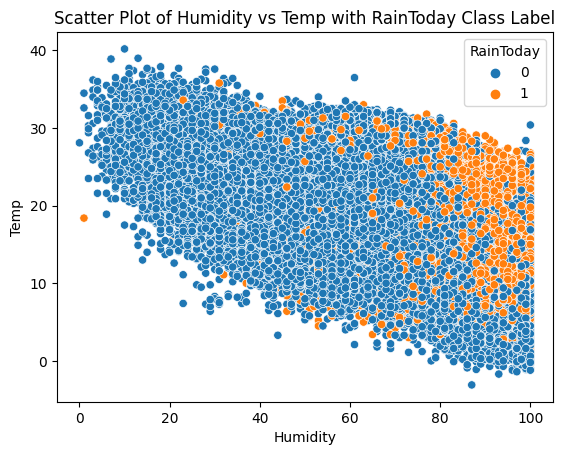

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(x='Humidity', y='Temp', hue='RainToday', data=rainfall_df)
plt.xlabel('Humidity')
plt.ylabel('Temp')
plt.title('Scatter Plot of Humidity vs Temp with RainToday Class Label')
plt.show()


# **Step #3: Create the independent (X) and dependent (y) Arrays**


In [12]:
# Type your code here to create the X-array.

X = rainfall_df[['Humidity', 'WindSpeed']].values



In [13]:
# Type your code here to create the y-array.

y = rainfall_df['RainToday'].values

# **Step#4: Standardizing and Splitting the data into Training and Testing sets**

In [16]:
# Type your code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# **Step#5: Creating, Training, and Testing the KNN model**

In [17]:
# Type your code here to import the KNN algorithm, initialize the model, and set hyperparameters (K = 5)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7699274343252517


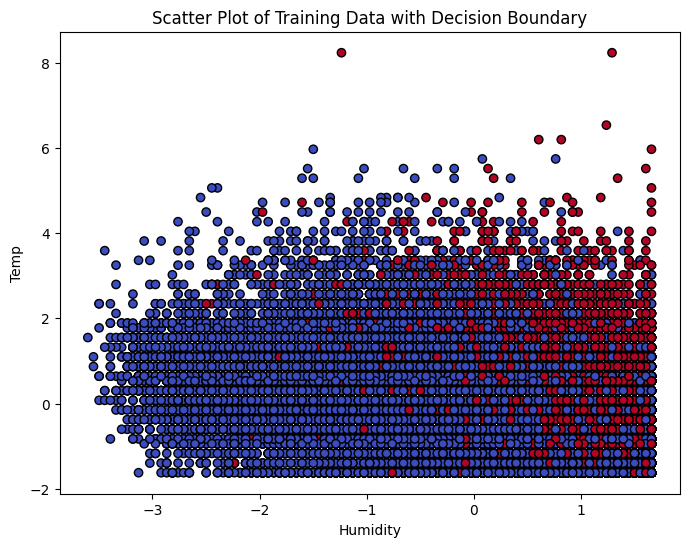

In [24]:
# Make the scatter plot of the training data and draw the decision boundary.
import numpy as np
import matplotlib.pyplot as plt


# Create the scatter plot of training data with decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.xlabel('Humidity')
plt.ylabel('Temp')
plt.title('Scatter Plot of Training Data with Decision Boundary')

plt.show()


# **Step#6: Evaluating performance of the KNN model**

In [25]:
# Type your code here to compute the accuracy score.
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7699274343252517


In [26]:
# Type your code here to create the Confusion Matrix.

# Create the confusion matrix in the form of Pandas Dataframe
from sklearn.metrics import confusion_matrix
import pandas as pd
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['No Rain', 'Rain'], columns=['No Rain (Predicted)', 'Rain (Predicted)'])
print(cm_df)


         No Rain (Predicted)  Rain (Predicted)
No Rain                12301              1531
Rain                    2559              1386


# **Step#7: Finding the optimal K value of the KNN model**

Maximum Accuracy Score: 0.79 with K = 10


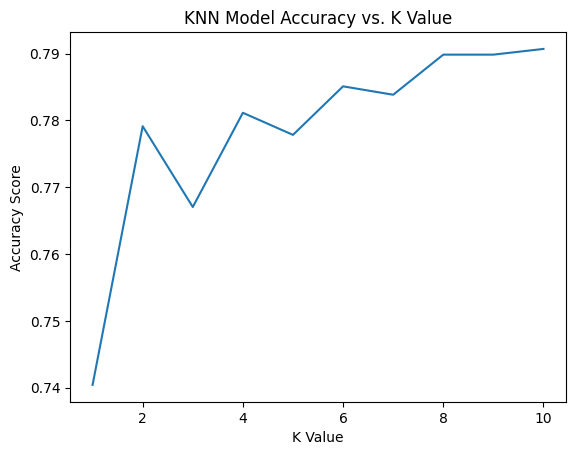

In [28]:
# Type your code here.

# Print the maximum accuracy score and the corresponding K value

# Plot the accuracy score vs. the k values
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

accuracy_scores = []
k_values = range(1, 11)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=3)
    accuracy = scores.mean()
    accuracy_scores.append(accuracy)
    
max_accuracy = max(accuracy_scores)
optimal_k = k_values[accuracy_scores.index(max_accuracy)]
print(f"Maximum Accuracy Score: {max_accuracy:.2f} with K = {optimal_k}")

plt.plot(k_values, accuracy_scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy Score')
plt.title('KNN Model Accuracy vs. K Value')
plt.show()



# **Step #8: Use the model to make predictions with new instances**



##### **1. `Humidity = 85` and `Pressure = 9.8`**


In [31]:
# Type your code here 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

knn = KNeighborsClassifier(n_neighbors=optimal_k)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
knn.fit(X_scaled, y_train)
new_instance1 = np.array([[85, 9.8]])
new_instance1_scaled = scaler.transform(new_instance1)
prediction1 = knn.predict(new_instance1_scaled)
print("Prediction for new instance 1 = ", prediction1)

Prediction for new instance 1 =  [1]


##### **2. `Humidity = 20` and `Pressure = 10.2`**

In [32]:
# Type your code here
new_instance2 = np.array([[20, 10.2]])
new_instance2_scaled = scaler.transform(new_instance2)
prediction2 = knn.predict(new_instance2_scaled)
print("Prediction for new instance 2 = ", prediction2)

Prediction for new instance 2 =  [1]
